/usr/share/fonts/SimHei.ttf
508
   price             定额单价  定量单价
0     47  47.000000000000  47.0
1     85  60.530303030303  66.0
2      3   8.188339785926  45.0
3     25   9.843134034166  40.0
4      9   9.662101880018  33.8
163
   price             定额单价             定量单价
0     58  58.000000000000  58.000000000000
1     34  42.869565217391  46.000000000000
2      6  14.063391442155  32.666666666667
3     14  14.047489823609  28.000000000000
4     77  16.793434983927  37.800000000000
-end-


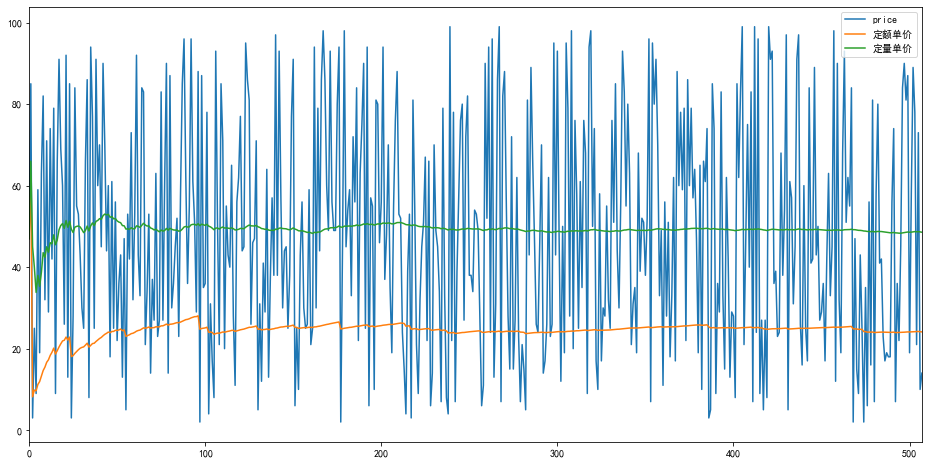

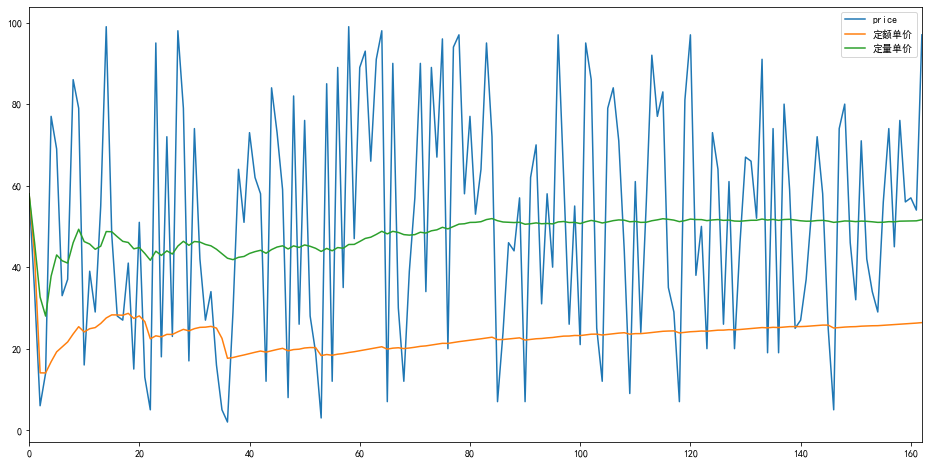

In [11]:
# %%timeit
########-----仅算平均持有单价-----########
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt


# 定量（平均成本单价） = 总买入额/总买入量
def dingliang_price(row):
    amount = 0.0 #总额
    nday = len(row)
    for index in range(nday - 1):
        amount = amount + row[index]
    return 1.0 * amount / nday

# 定额（平均成本单价） = 总买入额/总买入量
def dinge_price(row):
    volume = 0.0 #总量
    nday = len(row)
    for index in range(nday - 1):
        volume = volume + 1 / row[index]
    return 1.0 * nday / volume

def just_val(rdarr):
     for row in rdarr:
        volap = dingliang_price(row)
        amtap = dinge_price(row)
#         print("定量单价={0}，定额单价={1}".format(volap, amtap))
#         print("定量单价/定额单价 = {0}".format(1.0*volap/amtap))
        if(amtap>=volap):
            print("-=-=-=-=-=-=-")
            print(row)

def eachtime():
    # 随机长度
    nday = random.randint(10,1000) #交易天数 通常在四年以内
    minpi,maxpi= 2,100 #价格最小最大值
    # 随机矩阵 n 行 1 列
    rdarr = np.random.randint(minpi, maxpi, size=(nday,))
    df = pd.DataFrame(rdarr, columns=['price'])
    pd.set_option('precision', 12) #小数点精度
    #### 定额方式 ####
    df['amt_p-rec'] = 1.0/df['price'] # 价格倒数 p-rec
    df['amt_sum-vol'] = df['amt_p-rec'].cumsum() #定额总量，价格倒数累加求和
#     df['amt_sum-amt'] = df.index + 1 #定额总价
    df['定额单价'] = (df.index + 1)/df['amt_sum-vol'] #定额平均单价 = 总价/总量
    
    #### 定量方式 ####
#     df['vol_sum-vol'] = df.index + 1 #定量总量
    df['vol_sum-vol'] = df['price'].cumsum() # 定量总价
    df['定量单价'] = df['vol_sum-vol']/(df.index + 1) #定量平均单价 = 总价/总量
    
    rstdf = df[['price','定额单价','定量单价']]
    print(nday) 
#     rstdf.plot()
    print(rstdf.head())

def init_font():
    font_name = 'SimHei' 
    plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    plt.rcParams['font.sans-serif'].append(font_name)
    plt.rcParams['figure.figsize'] = 16, 8
    import matplotlib.font_manager
    matplotlib.font_manager._rebuild()
    print(matplotlib.font_manager.findfont(font_name))


def main(): 
    init_font()
    testcnt = 2 #000
    for i in range(testcnt):
        eachtime() #算单条
    print("-end-")

if __name__ == '__main__':
    main()

In [9]:
import matplotlib.pyplot as plt
font_name = 'SimHei' 
plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.sans-serif'].append(font_name)

print(plt.rcParams['font.sans-serif'])
print(plt.rcParams['font.family'])

['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif', 'SimHei']
['SimHei']


Text(0.5, 1.0, 'Whoo Hoo!!!')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


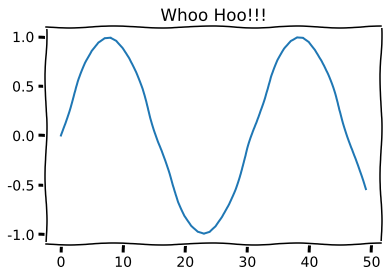

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.xkcd()
plt.plot(np.sin(np.linspace(0, 10)))
plt.title('Whoo Hoo!!!')